Title: Warehouse and Retail Sales
Description: To perform Descriptive statistics,visualisation and supervised learning for warehouse and retail sales of alcohol.
Created By- Suraj Sagar Chathiri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
sales = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')
print(sales.head())
print()
# Print descriptive statistics
print("The descriptive statistics of sales:")
print(sales.describe())
print()
print(sales.shape)
print()
print(sales.info())
print()

   YEAR  MONTH                           SUPPLIER ITEM_CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM_DESCRIPTION ITEM_TYPE  RETAIL_SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL_TRANSFERS  WAREHOUSE_SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

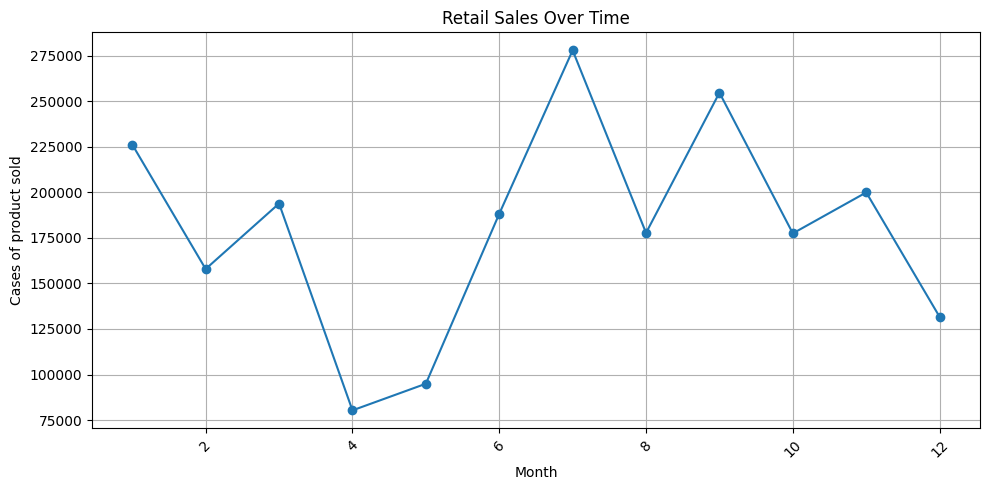

In [ ]:
# Plotting retail sales over time
plt.figure(figsize=(10, 5))
plt.plot(sales.groupby(['MONTH'])['RETAIL_SALES'].sum(), marker='o', linestyle='-')
plt.title('Retail Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Cases of product sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

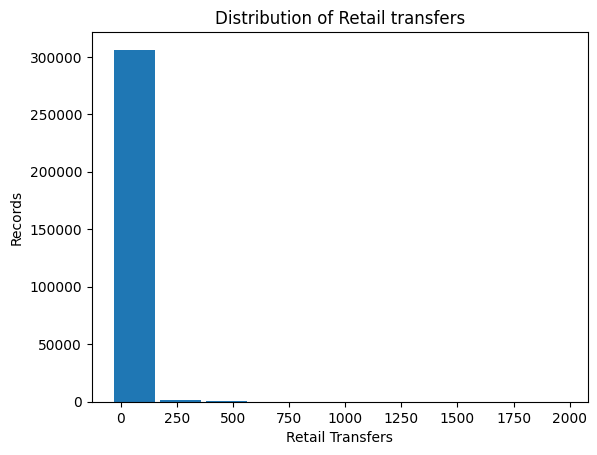

In [ ]:
#Create a histogram to show the distribution of Retail transfers.
plt.hist(sales['RETAIL_TRANSFERS'],bins=10, rwidth=0.9)
plt.title('Distribution of Retail transfers')
plt.ylabel('Records')
plt.xlabel('Retail Transfers')
plt.show()

Text(0, 0.5, 'Frequency of Item Type')

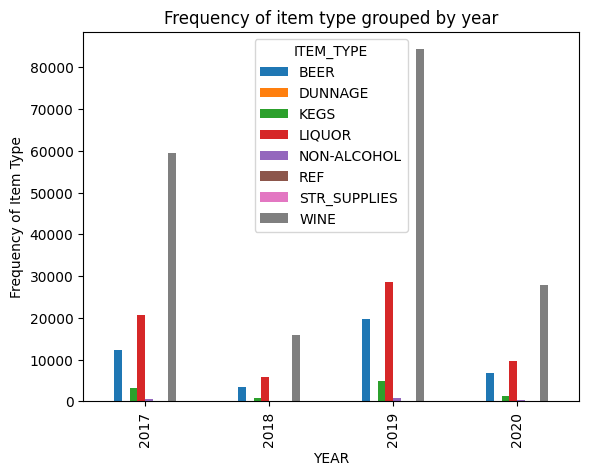

In [ ]:
#create a barplot to show the frequency of item type grouped by year
pd.crosstab(sales.YEAR,sales.ITEM_TYPE).plot(kind='bar')
plt.title('Frequency of item type grouped by year')
plt.xlabel('YEAR')
plt.ylabel('Frequency of Item Type')

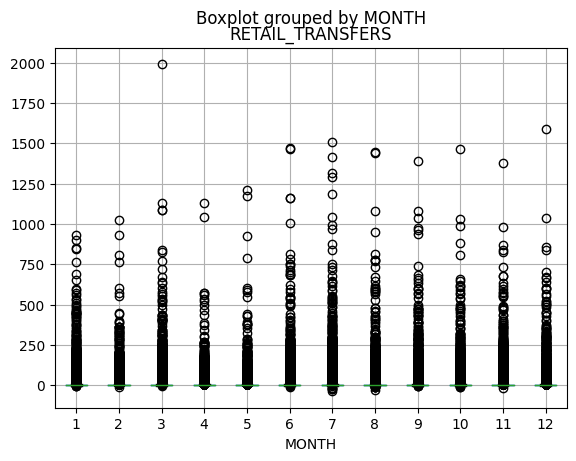

In [ ]:
#Create a boxplot to show the distribution of warehouse sales over months.
sales.boxplot(column = "RETAIL_TRANSFERS",
           by = "MONTH")
plt.show()

In [ ]:
# Using replace function, replace strings with NaN Values.
sales.replace("", float("NaN"), inplace=True)

# Remove the rows using any NaN values
sales_cleaned = sales.dropna(how='any')

# Print the dataset again after cleaning.
print("Cleaned DataFrame shape:", sales_cleaned.shape)
print("Rows removed:", sales.shape[0] - sales_cleaned.shape[0])
print(sales_cleaned.info())

# Converting datatype from Categorical values to numerical values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in sales_cleaned.columns:
    if sales_cleaned[col].dtypes == 'object':
        sales_cleaned[col] = le.fit_transform(sales_cleaned[col])

print(sales_cleaned.head())

# k Nearest Neighbor
# Start by defining k (the  number of neighbors) and target value.
k = 15
newyear = 2017
newmonth = 3
newitemtype = 4
newretailtransfer = 1.25
newwarehousesales = 13

# Setting up the x and y variables
x = sales_cleaned[['YEAR', 'MONTH', 'ITEM_TYPE', 'RETAIL_TRANSFERS', 'WAREHOUSE_SALES']]
y = sales_cleaned['RETAIL_SALES']
target_values = [[newyear, newmonth,newitemtype, newretailtransfer, newwarehousesales]]

# Performing analysis to predict the number of Retail transfers

# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
print('Linear Regression prediction of the number of Retail sales:')
print(lr.predict(target_values))
print()

# Nearest neighbour
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(x,y)
print('Mean retail sales score of the 15 nearest neighbors')
print(knnregressor.predict(target_values))
print()

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(x,y)
print('Decision tree prediction of the number of Retail sales:')
print(dtregressor.predict(target_values))
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(x,y)
print('Random Forest prediction of the number of Retail sales:')
print(rfregressor.predict(target_values))
print()

# Neural Network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(x,y)
print('Neural network prediction of the number of Retail sales:')
print(nnregressor.predict(target_values))
print()

# Create a train, test dataset with 75/25 split. Use this to train and test its accuracy.
from sklearn.model_selection import train_test_split
trainingx, testx, trainingy, testy = train_test_split(x, y, random_state=1)

# Using each technique on the train/test data and determine which is the most accurate (smallest errors).

# Linear Regression
lr = LinearRegression()
lr.fit(trainingx, trainingy)
predicted = lr.predict(testx)
predictionerror = abs(predicted - testy)
print('Linear regression prediction error:')
print(np.mean(predictionerror))
print()

# Nearest Neighbor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predictionerror = abs(predicted - testy)
print('Nearest neighbor prediction error:')
print(np.mean(predictionerror))
print()

# Decision Tree
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(trainingx, trainingy)
predicted = dtregressor.predict(testx)
predictionerror = abs(predicted - testy)
print('Decision tree prediction error:')
print(np.mean(predictionerror))
print()

# Random Forest
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted - testy)
print('Random Forest prediction error:')
print(np.mean(predictionerror))
print()

# Neural Network
nnregressor = MLPRegressor()
nnregressor.fit(trainingx, trainingy)
predicted = nnregressor.predict(testx)
predictionerror = abs(predicted - testy)
print('Neural Network prediction error:')
print(np.mean(predictionerror))
print()

Cleaned DataFrame shape: (307477, 9)
Rows removed: 168
<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM_CODE         307477 non-null  object 
 4   ITEM_DESCRIPTION  307477 non-null  object 
 5   ITEM_TYPE         307477 non-null  object 
 6   RETAIL_SALES      307477 non-null  float64
 7   RETAIL_TRANSFERS  307477 non-null  float64
 8   WAREHOUSE_SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB
None


<ipython-input-18-c01fe900162c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_cleaned[col] = le.fit_transform(sales_cleaned[col])
<ipython-input-18-c01fe900162c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_cleaned[col] = le.fit_transform(sales_cleaned[col])
<ipython-input-18-c01fe900162c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

   YEAR  MONTH  SUPPLIER  ITEM_CODE  ITEM_DESCRIPTION  ITEM_TYPE  \
0  2020      1       273          3              4502          7   
1  2020      1       264          8             22387          7   
2  2020      1       271         11             27440          0   
3  2020      1       186         13             28172          7   
4  2020      1        91         20             27953          7   

   RETAIL_SALES  RETAIL_TRANSFERS  WAREHOUSE_SALES  
0          0.00               0.0              2.0  
1          0.00               1.0              4.0  
2          0.00               0.0              1.0  
3          0.00               0.0              1.0  
4          0.82               0.0              0.0  
Linear Regression prediction of the number of Retail sales:
[1.35699115]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean retail sales score of the 15 nearest neighbors
[1.56533333]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Decision tree prediction of the number of Retail sales:
[1.21288192]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Random Forest prediction of the number of Retail sales:
[2.69670222]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Neural network prediction of the number of Retail sales:
[1.6836199]

Linear regression prediction error:
1.6917592549908802



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Nearest neighbor prediction error:
1.7830359394648976

Decision tree prediction error:
3.044104338779365

Random Forest prediction error:
1.7273371525756183

Neural Network prediction error:
2.486100949107636

